### <span style='color:blue'> Import the necessary libraries. </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### <span style='color:blue'> Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df </span>

(i.e. customer_df = pd.readcsv("")) 

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

### <span style='color:blue'> First, look at its main features (head, shape, info). </span>

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

 - It has **9134 rows** and **24 columns**

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

 - There are **16 categorical**, **6 numerical(int)** and **2 numerical(float)** value columns
 - There are **no null** values.

### <span style='color:blue'> Rename the columns so they follow the PE8 (snake case).</span>

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
customer_df.columns = [customer_df.columns[i].lower().replace(' ','_') for i in range(len(customer_df.columns))]

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### <span style='color:blue'> Fix the data types of any other column/columns as you might see necessary.</span>

Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format. 

In [9]:
# converting effective_to_date column from object to datetime format

customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [11]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### <span style='color:blue'> Plot a correlation matrix, and comment on what you observe. </span>

In [12]:
corr = round(customer_df.corr(),2)

<AxesSubplot:>

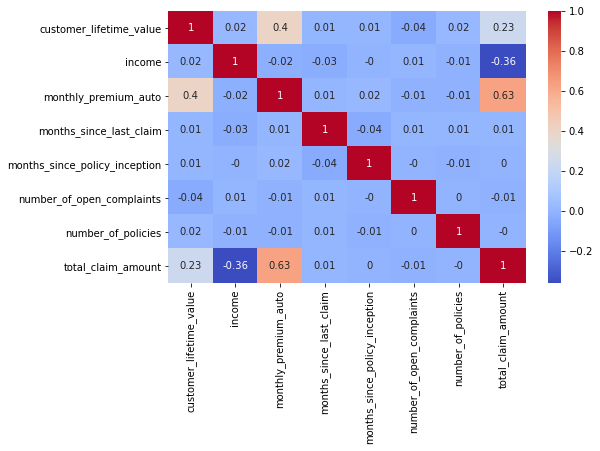

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True,cmap='coolwarm')

 - Our target column is **total_claim_amount**
 - There is **no multicolinarity** in the independent variables.
 - **monthly_premium_auto** is the only column **highly correlated** with the **target column**

### <span style='color:blue'> Plot every continuous variable. Comment what you can see in the plots. </span>

In [14]:
# separating the numerical columns to plot a graph
numcols = customer_df[customer_df.select_dtypes("number").columns]

In [15]:
numcols.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


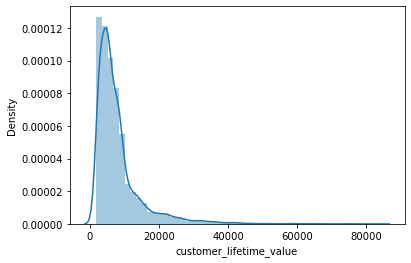

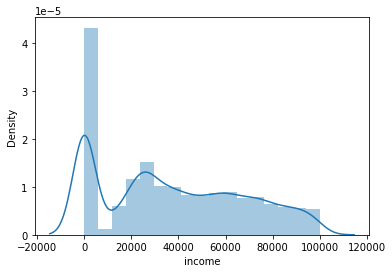

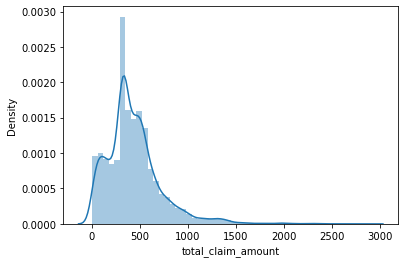

In [16]:
# Considering the columns with only continous values.
numcols = numcols.drop(['monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'], axis=1)
for column in numcols.columns:
    sns.distplot(numcols[column])  # takes to see the distribution
    plt.show()

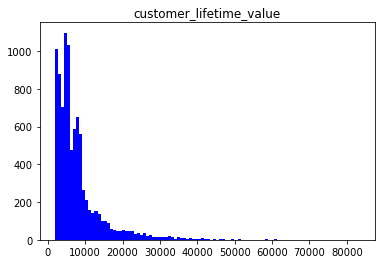

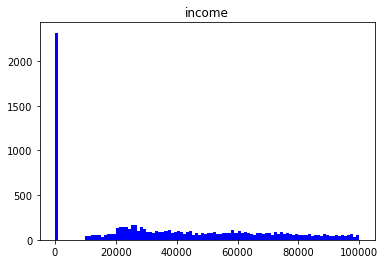

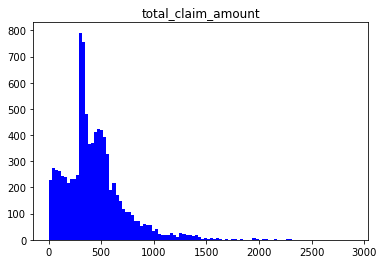

In [34]:
for column in numcols.columns:
    plt.title(column)
    plt.hist(data=numcols, x=column,bins=100, color='b')
    plt.show()

 - **None of the columns are normally distributed.**
 - **We can applay a transformation to get the normal distribution.**

### <span style='color:blue'> Do the same with the categorical variables </span>

(be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [17]:
catCols = customer_df[customer_df.select_dtypes("object").columns]

In [18]:
catCols.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


 - **Dropping 'customer' column, as it is just a id to each customer and we are not gaining any extra information from it.**

In [19]:
cat = catCols.drop(['customer'], axis=1)

In [20]:
cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [21]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


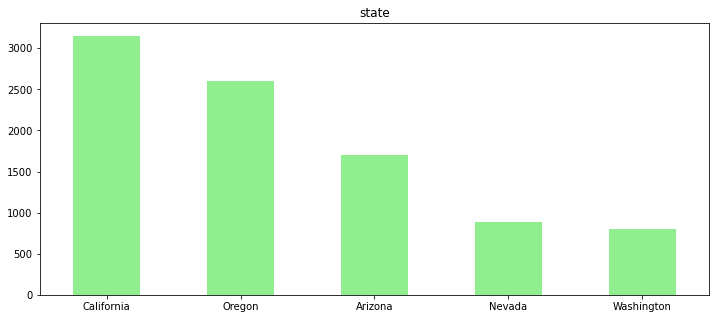

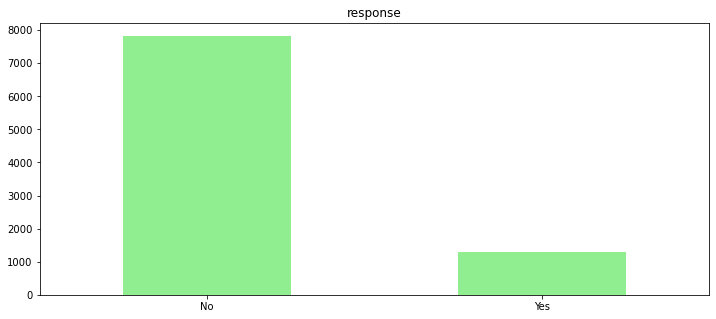

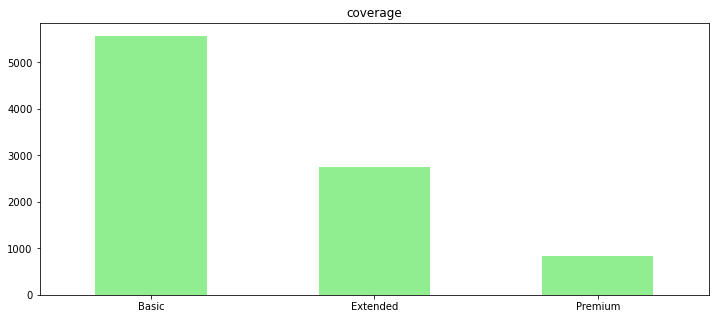

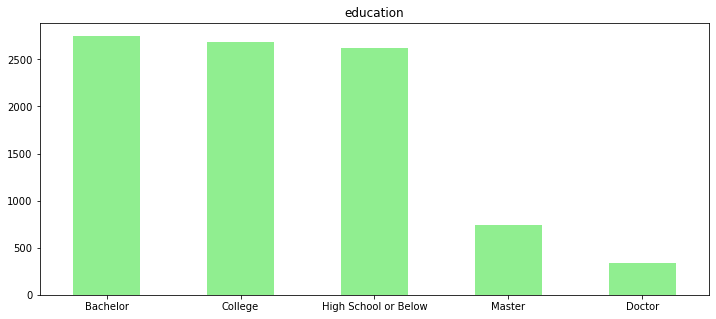

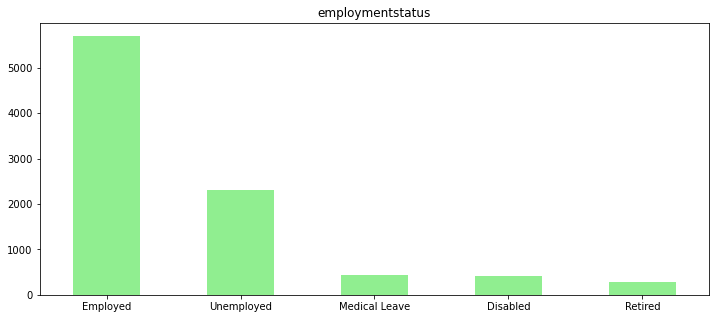

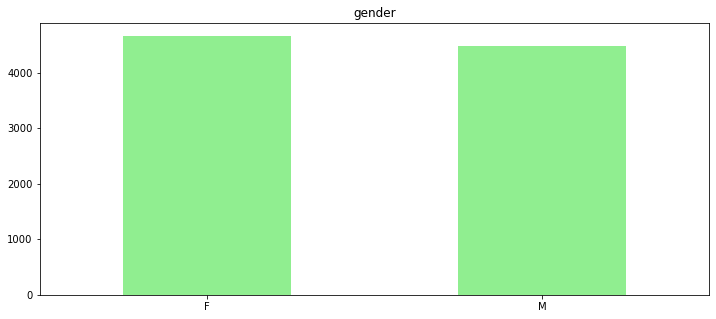

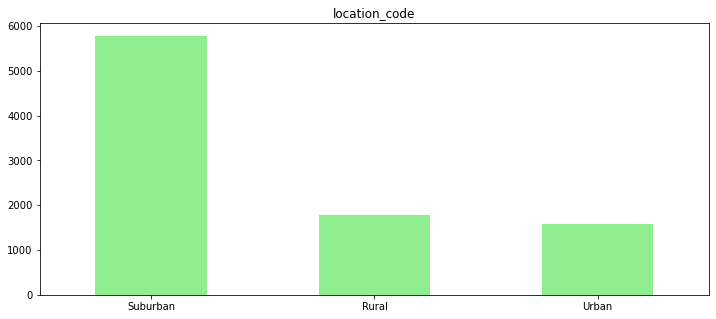

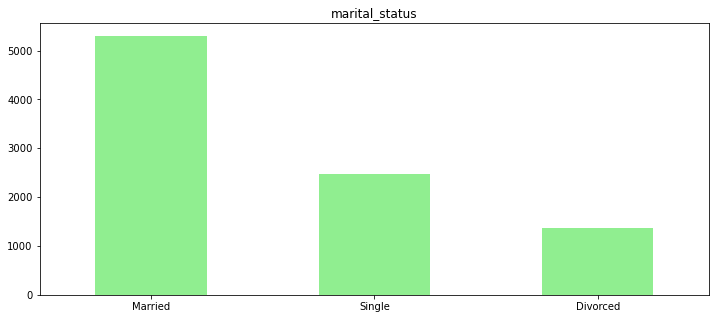

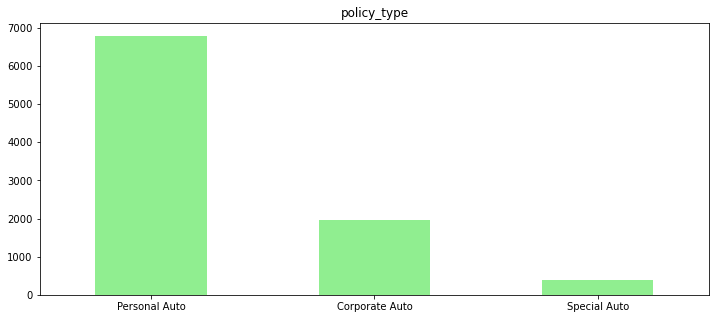

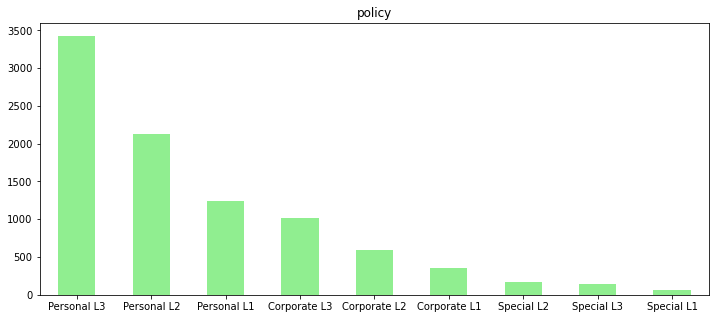

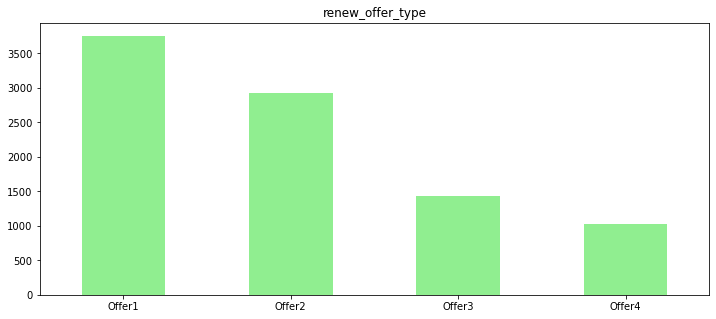

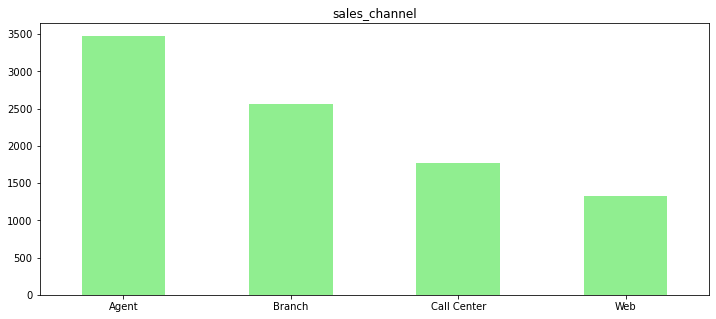

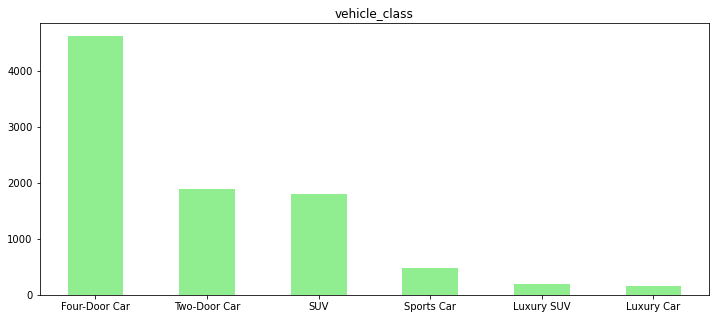

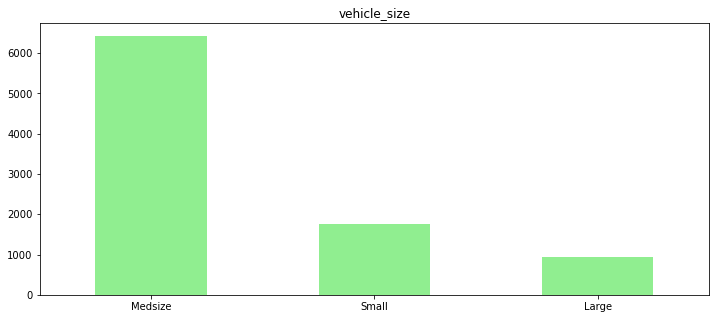

In [40]:
for column in cat.columns:
    plt.figure(figsize=(12,5))
    cat[column].value_counts().plot.bar(rot=0, color='lightgreen').set
    plt.title(column)
    plt.show()

 - **Plot 1** : is about **'state' column**, there are total **five states** . California is having most of the customers than the others where as Nevada and Washington are having less customers
 - **Plot 2** : is about **'response' column**, the customers responses are **yes and no** and graph shows that there are more of no response compare to yes. 
 - **Plot 3** : is about **'coverage' column**, it shows **three types** of coverage namely basic, extended and premium. Most of the customers enrolled with basic coverage policy.
 - **Plot 4** : is about **'education' column**, most of the customers are holding a bachelor degree followed by college, high school or below and master. Very few customers are doctor by profession.
 - **Plot 5** : is about **'employmentstatus' column**, most of the customers are employed at the movement. Apart from that we do have customers, who are unemployed, on medical leave, disabled and retired.
 - **Plot 6** : is about **'gender' column**, we have almost equal ratio of male and female customers.
 - **Plot 7** : is about **'location_code' column**, a huge amount of customers are from Suburban area. Where as rural and urban areas share almost equal ratio.
 - **Plot 8** : is about **'marital_status' column**, most of the customers are married followed by single and divorced.
 - **Plot 9** : is about **'policy_type' column**, there are higher number of policies taken against personal auto as compared to corporate auto and special auto.
 - **Plot 10** : is about **'policy' column**, there are total nine policies present in the data.
 - **Plot 11** : is about **'renew_offer_type' column**, four types of renewal offers are given to the customers.
 - **Plot 12** : is about **'sales_channel' column**, there are total four sales channel, most customers are achieved by agents.
 - **Plot 13** : is about **'vehicle_class' column**, total 6 types of vehicle class is covered by the policies, among that 'four-door car' is the highest class to have the policies for.
 - **Plot 14** : is about **'vehicle_size' column**, there are total three types of vehicle sizes are present in the database. The vehicle with medium size is the height size type to cover the policies.

### <span style='color:blue'> Look for outliers in the continuous variables. </span>

(Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them. 

In [23]:
num = customer_df[customer_df.select_dtypes("number").columns]

In [24]:
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


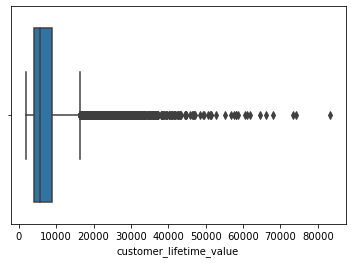

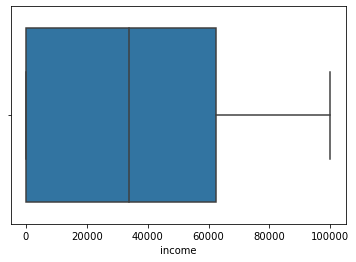

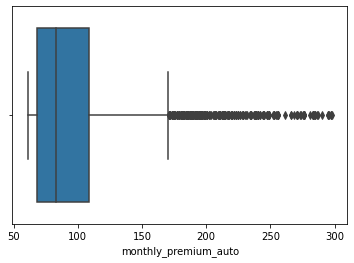

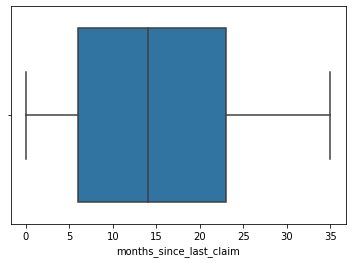

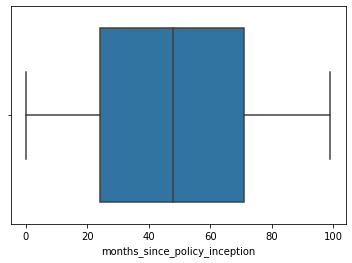

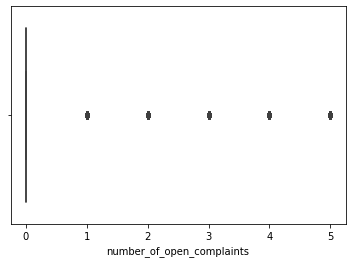

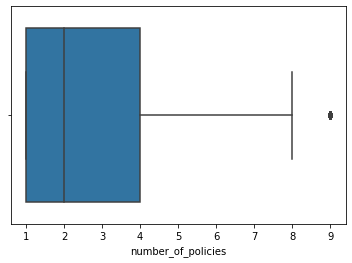

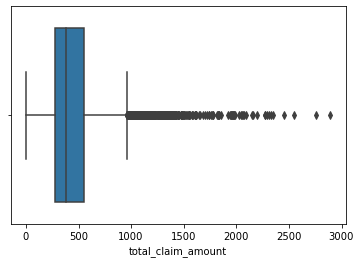

In [25]:
for column in num.columns:
    sns.boxplot(num[column])  # takes to see the outliers
    plt.show()

**Columns below has an outliers in it**
 - 'customer_lifetime_value'
 - 'monthly_premium_auto'
 - 'number_of_open_complaints'
 - 'number_of_policies'
 - 'total_claim_amount' : this is the target column.
 
**We can perform below two steps to deal with the outliers**
 - We can use IQR method to deal with the outliers
 - We can apply transformations(log-transformation, box-cox transformation) on the columns having outliers.

### <span style='color:blue'> Check all columns for NaN values. Decide what (if anything) you will need to do with them. </span>

In [26]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [27]:
customer_df.isnull().values.any()

False

**None of the columns are having null or nan values**